dict_keys(['cvg', 'qual', 'cr_count', 'abc_dus', 'scc_HI', 'abc_wat', 't_final', 'rmin', 'rmax', 'zmin', 'zmax', 'n_gas', 'Tgas', 'Tdust', 'Tdust1', 'Tdust2', 'Tdust3', 'Tdust4', 'ndust_1', 'ndust_2', 'ndust_3', 'ndust_4', 'ndust_t', 'rhodus_1', 'rhodus_2', 'rhodus_3', 'rhodus_4', 'sigdus_1', 'sigdus_2', 'sigdus_3', 'sigdus_4', 'sigd_av', 'd2gmas', 'd2gnum', 'deplet', 'mg_cell', 'md_cell', 'presr_t', 'presr_g', 'egain_d', 'egain_ab', 'egain_e', 'egain_d1', 'egain_e1', 'egain_d2', 'egain_e2', 'egain_d3', 'egain_e3', 'egain_d4', 'egain_e4', 'flx_tot', 'flx_Xray', 'G0_UV', 'flx_Lya', 'flx_Vis', 'flx_NIR', 'flx_MIR', 'flx_FIR', 'vr_tot', 'vz_tot', 'ani_tot', 'vr_Xray', 'vz_Xray', 'ani_Xray', 'vr_UV', 'vz_UV', 'ani_UV', 'vr_Lya', 'vz_Lya', 'ani_Lya', 'vr_Vis', 'vz_Vis', 'ani_Vis', 'vr_NIR', 'vz_NIR', 'ani_NIR', 'vr_MIR', 'vz_MIR', 'ani_MIR', 'vr_FIR', 'vz_FIR', 'ani_FIR', 'Av_ISM', 'Av_Star', 'UV_G0_I', 'UV_G0_S', 'LyAG0_a', 'LyANF0', 'zeta_X', 'Ncol_I', 'Ncol_S', 'N_H2_I', 'N_H2O_I', 'N_OH

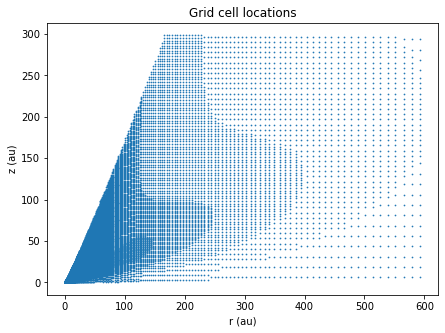

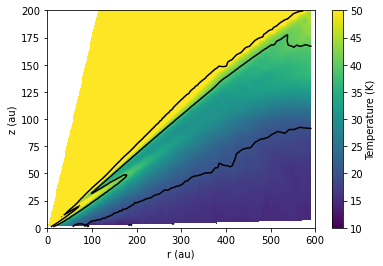

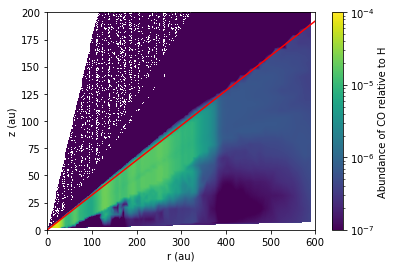

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy.interpolate import griddata

filename='/Users/mengfeilong/desktop/iter_0001.dat' #change to appropriate path as needed
def load_output(filename):
    output = np.loadtxt(filename, comments='!')
    with open(filename, 'r') as f:
        columnnames = f.readline().split()[1:]
        return dict(zip(np.array(columnnames), output.T))
    
results = load_output(filename)
print(results.keys())
print(results.get('CO'))

fig = plt.figure(figsize = (7,5))
plt.title('Grid cell locations')
plt.scatter(0.5*(results['rmin']+results['rmax']),0.5*(results['zmin']+results['zmax']),s=0.5)
plt.xlabel('r (au)')
plt.ylabel('z (au)')
plt.show()
rgrid, zgrid = np.mgrid[0:600:300j, 0:200:200j]

def regrid_quantity(outputdict, key, rgridvals, zgridvals):
    """
    outputdict: Python dictionary holding rac2d output results
    key: key for the quantity that you want to interpolate
    rgridvals: 2D array holding the r values (in au) on the interpolated grid
    zgridvals: 2D array holding the z values (in au) on the interpolated grid
    """
    rvals = 0.5*(outputdict['rmin']+outputdict['rmax'])
    zvals = 0.5*(outputdict['zmin']+outputdict['zmax'])
    #helpful to take the log because the values span many orders of magnitude
    log_output = np.ma.log10(outputdict[key]).filled(-100)
    log_output_grid = griddata((rvals,zvals), log_output, (rgridvals, zgridvals), method='linear')
    return 10**log_output_grid

def plot_quantity(outputdict, key, rgridvals, zgridvals, vmin=0, vmax = 100,logscale = False, label=None, levels = []):
    """
    outputdict: Python dictionary holding rac2d output results
    key: key for the quantity that you want to interpolate
    rgridvals: 2D array holding the r values (in au) on the interpolated grid
    zgridvals: 2D array holding the z values (in au) on the interpolated grid
    vmin: Lowest value to show in plot
    vmax: Largest value to show in plot
    logscale: If true, plot in logscale. Otherwise, plot in linear scale
    contours: Contours to draw on plot
    """
    outputgrid = regrid_quantity(outputdict, key, rgridvals, zgridvals)
    if logscale:
        plt.imshow(outputgrid.T, origin='lower', aspect='auto', norm=col.LogNorm(vmin=vmin, vmax = vmax),
               extent = [np.min(rgridvals),np.max(rgridvals), np.min(zgridvals), np.max(zgridvals)])
    else:
        plt.imshow(outputgrid.T, origin='lower', aspect='auto', vmin=vmin, vmax = vmax,
               extent = [np.min(rgridvals),np.max(rgridvals), np.min(zgridvals), np.max(zgridvals)])
    cbar = plt.colorbar()
    if label:
        cbar.set_label(label)
    if len(levels)>0:
        plt.contour(outputgrid.T,levels, colors='k', extent = [np.min(rgridvals),np.max(rgridvals), np.min(zgridvals), np.max(zgridvals)])
    
    plt.xlabel('r (au)')
    plt.ylabel('z (au)')
    plt.show()
    
plot_quantity(results, 'Tgas', rgrid, zgrid,vmin=10,vmax = 50, label='Temperature (K)', levels = [20,40,60])
r = np.array([0, 600])
z = 0.32 * r
plt.plot(r, z, color='red')
plot_quantity(results, 'CO', rgrid, zgrid,vmin=1.e-7,vmax = 1.e-4, label='Abundance of CO relative to H',logscale=True)

1.06662e-08


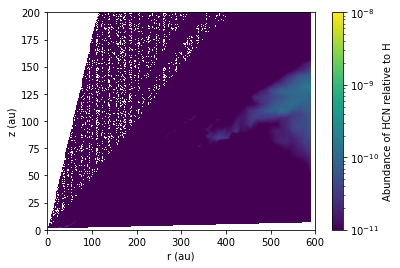

1.49809e-10


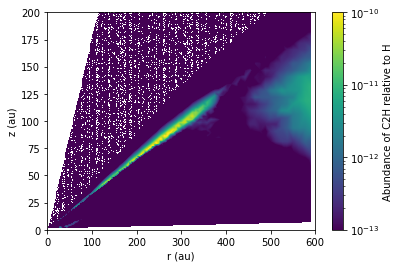

4.58377e-10


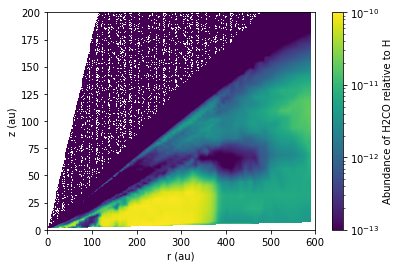

1.15185e-09


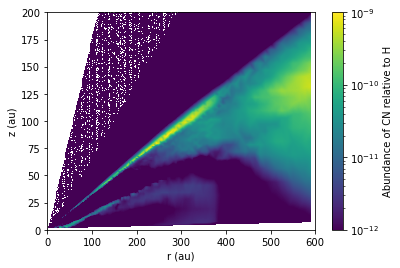

In [17]:
print(np.amax(results.get('HCN')))
plot_quantity(results, 'HCN', rgrid, zgrid,vmin=1.e-11,vmax = 1.e-8, label='Abundance of HCN relative to H',logscale=True)
print(np.amax(results.get('C2H')))
plot_quantity(results, 'C2H', rgrid, zgrid,vmin=1.e-13,vmax = 1.e-10, label='Abundance of C2H relative to H',logscale=True)
print(np.amax(results.get('H2CO')))
plot_quantity(results, 'H2CO', rgrid, zgrid,vmin=1.e-13,vmax = 1.e-10, label='Abundance of H2CO relative to H',logscale=True)
print(np.amax(results.get('CN')))
plot_quantity(results, 'CN', rgrid, zgrid,vmin=1.e-12,vmax = 1.e-9, label='Abundance of CN relative to H',logscale=True)